# Capstone Project - 2019 WTA Tennis Rankings
### Applied Data Science Capstone by IBM/Coursera

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)



## Introduction: Business Problem <a name="introduction"></a>

In this project we will try to create a prediction model that will be able to predict the world ranking of a womens tennis based on thier serve stats from 2019. This may be able to help the WTA provide a better metric for world rankings for example, if two players had the same number of wins in a season, using this metric may differentiate them better. 

We will use our data science powers to generate predictions of WTA world rankings. 

## Data <a name="data"></a>

The data is taken from the WTA website and provides comprehensive serve statistics for the top womens players in the world for 2019. After around ranking 250, there are gaps between rankings, hence only rankings 1 to 250 will be used. 
The Key data includes:
* Player
* Ranking
* Matches
* Aces
* Double Faults
* 1st Serve Percentage
* 2nd Serve Percentage
* 1st Serve Points
* 2nd Serve Points
* Service Games Win Percentage
* Break Point Service Game Win Percentage

After data cleaning, exploratory data visualisation will be used to determine if there are any obvious trends within the data that can help with model evaulation.

### Data properties


In [97]:
###### LETS IMPORT SOME PACKAGES #########
import pandas as pd 
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from sklearn import linear_model

In [17]:
##### We need to import out data from CSV ######

file_path = 'https://github.com/c00kie54/Coursera_Capstone/raw/master/Serve-Table%201.csv'
df = pd.read_csv(file_path, error_bad_lines=False)

new_header = df.iloc[0] #grab the first row for the header
df = df[1:] #take the data less the header row
df.columns = new_header #set the header row as the df header

df.dtypes

0
Pos              object
Player           object
Rank             object
Matches          object
Aces             object
DF               object
1st Srv %        object
1st Srv Pts %    object
2nd Srv %        object
Srv Pts Won %    object
BP SVD %         object
Srv Gm Won %     object
dtype: object

In [18]:
df.head()

,Pos,Player,Rank,Matches,Aces,DF,1st Srv %,1st Srv Pts %,2nd Srv %,Srv Pts Won %,BP SVD %,Srv Gm Won %
1,194,\nKateryna Bondarenko\nKateryna Bondarenko\n\nUKR,9999,2,5,15,48.9%,58.5%,35.3%,46.6%,44.4%,47.4%
2,219,\nAna Konjuh\nAna Konjuh\n\nCRO,1270,1,3,8,42.6%,76.9%,42.9%,57.4%,25%,72.7%
3,272,\nAnna Tatishvili\nAnna Tatishvili\n\nUSA,993,1,0,4,58.5%,33.3%,17.6%,26.8%,14.3%,0%
4,175,\nEkaterina Makarova\nEkaterina Makarova\n\nRUS,992,3,10,9,67.8%,60.5%,44.3%,55.3%,57.6%,62.2%
5,264,Selena Janicijevic\nSelena Janicijevic\n\nFRA,911,1,0,0,58.1%,44%,27.8%,37.2%,33.3%,14.3%


### Cleaning the data
The data needs cleaning up: 
1. The types need to be changed to intergers
2. Percentages need to be changed to decimals
3. Ranks 250+ need to be removed
4. The name field shows duplicates \nKateryna Bondarenko\nKateryna Bondarenko\n\nUKR to Kateryna Bondarenko. May just be easier to remove the name field as we are not actually worried about who is which rank, just looking at service stats and rank.

In [53]:
##### Dropping Player Column ######

data = df.drop(['Player'],axis=1)
data = data.drop(['Pos'],axis=1)
data.head()

,Rank,Matches,Aces,DF,1st Srv %,1st Srv Pts %,2nd Srv %,Srv Pts Won %,BP SVD %,Srv Gm Won %
1,9999,2,5,15,48.9%,58.5%,35.3%,46.6%,44.4%,47.4%
2,1270,1,3,8,42.6%,76.9%,42.9%,57.4%,25%,72.7%
3,993,1,0,4,58.5%,33.3%,17.6%,26.8%,14.3%,0%
4,992,3,10,9,67.8%,60.5%,44.3%,55.3%,57.6%,62.2%
5,911,1,0,0,58.1%,44%,27.8%,37.2%,33.3%,14.3%


In [54]:
##### Converting percentages to decimals  ######
data['1st Srv %'] = df['1st Srv %'].str.rstrip('%').astype('float') / 100.0
data['1st Srv Pts %'] = df['1st Srv %'].str.rstrip('%').astype('float') / 100.0
data['2nd Srv %'] = df['1st Srv %'].str.rstrip('%').astype('float') / 100.0
data['Srv Pts Won %'] = df['1st Srv %'].str.rstrip('%').astype('float') / 100.0
data['BP SVD %'] = df['1st Srv %'].str.rstrip('%').astype('float') / 100.0
data['Srv Gm Won %'] = df['1st Srv %'].str.rstrip('%').astype('float') / 100.0
data.head()

,Rank,Matches,Aces,DF,1st Srv %,1st Srv Pts %,2nd Srv %,Srv Pts Won %,BP SVD %,Srv Gm Won %
1,9999,2,5,15,0.489,0.489,0.489,0.489,0.489,0.489
2,1270,1,3,8,0.426,0.426,0.426,0.426,0.426,0.426
3,993,1,0,4,0.585,0.585,0.585,0.585,0.585,0.585
4,992,3,10,9,0.678,0.678,0.678,0.678,0.678,0.678
5,911,1,0,0,0.581,0.581,0.581,0.581,0.581,0.581


In [56]:
##### Converting Objects to floats/intergers  ######
data = data.astype(np.float16)
data = data.astype({"Rank": int,
                    "Matches": int, 
                    "Aces": int, 
                    "DF":int })


In [57]:
data.head()

,Rank,Matches,Aces,DF,1st Srv %,1st Srv Pts %,2nd Srv %,Srv Pts Won %,BP SVD %,Srv Gm Won %
1,10000,2,5,15,0.489014,0.489014,0.489014,0.489014,0.489014,0.489014
2,1270,1,3,8,0.426025,0.426025,0.426025,0.426025,0.426025,0.426025
3,993,1,0,4,0.584961,0.584961,0.584961,0.584961,0.584961,0.584961
4,992,3,10,9,0.678223,0.678223,0.678223,0.678223,0.678223,0.678223
5,911,1,0,0,0.581055,0.581055,0.581055,0.581055,0.581055,0.581055


In [58]:
# Get names of indexes for which column Rank has value greater than 250 
indexNames = data[ data['Rank'] > 250 ].index
# Delete these row indexes from dataFrame
data.drop(indexNames , inplace=True)

In [59]:
data.head()

,Rank,Matches,Aces,DF,1st Srv %,1st Srv Pts %,2nd Srv %,Srv Pts Won %,BP SVD %,Srv Gm Won %
66,250,3,20,13,0.544922,0.544922,0.544922,0.544922,0.544922,0.544922
67,249,3,2,3,0.757812,0.757812,0.757812,0.757812,0.757812,0.757812
68,248,3,2,4,0.597168,0.597168,0.597168,0.597168,0.597168,0.597168
69,247,3,13,20,0.526855,0.526855,0.526855,0.526855,0.526855,0.526855
70,246,1,4,9,0.465088,0.465088,0.465088,0.465088,0.465088,0.465088


In [60]:
data.shape

(221, 10)

The data has been cleansed. We now have 221 ranks from 1 to 250 and 11 columns of data.

## Exploratory Analysis

Here we can do some simple plots to determine if there are any obvious relationships between the different data classes.

Text(0, 0.5, 'Number of matches')

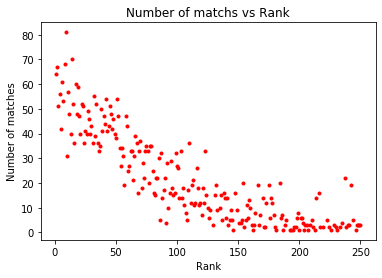

In [67]:
x = data['Rank']
y = data['Matches']
plt.plot(x,y,'r.')
plt.title("Number of matchs vs Rank")
plt.xlabel('Rank')
plt.ylabel('Number of matches')

Text(0, 0.5, 'Number of Aces')

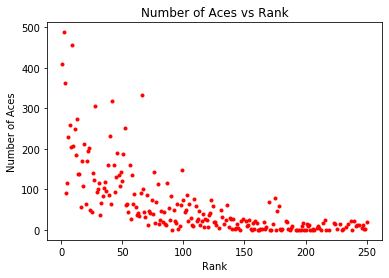

In [68]:
x = data['Rank']
y = data['Aces']
plt.plot(x,y,'r.')
plt.title("Number of Aces vs Rank")
plt.xlabel('Rank')
plt.ylabel('Number of Aces')

Text(0, 0.5, 'Number of Double faults')

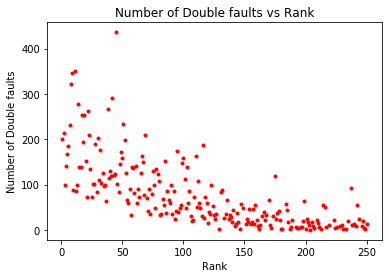

In [69]:
x = data['Rank']
y = data['DF']
plt.plot(x,y,'r.')
plt.title("Number of Double faults vs Rank")
plt.xlabel('Rank')
plt.ylabel('Number of Double faults')

Text(0, 0.5, '1st Srv %')

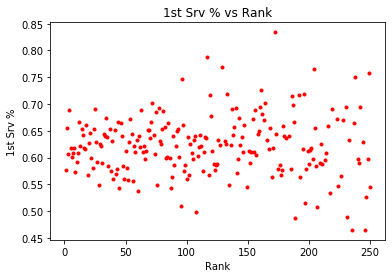

In [72]:
x = data['Rank']
y = data['1st Srv %']
plt.plot(x,y,'r.')
plt.title("1st Srv % vs Rank")
plt.xlabel('Rank')
plt.ylabel('1st Srv %')

Text(0, 0.5, '1st Srv Pts %')

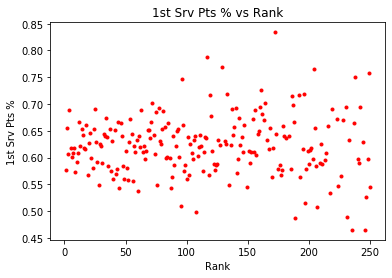

In [74]:
x = data['Rank']
y = data['1st Srv Pts %']
plt.plot(x,y,'r.')
plt.title("1st Srv Pts % vs Rank")
plt.xlabel('Rank')
plt.ylabel('1st Srv Pts %')

Text(0, 0.5, '2nd Srv %')

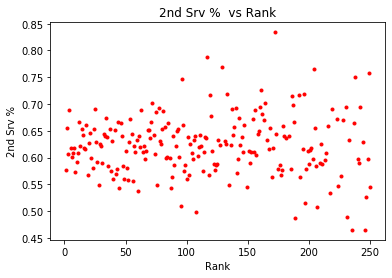

In [76]:
x = data['Rank']
y = data['2nd Srv %']
plt.plot(x,y,'r.')
plt.title("2nd Srv %  vs Rank")
plt.xlabel('Rank')
plt.ylabel('2nd Srv %')


Text(0, 0.5, 'Srv Pts Won %')

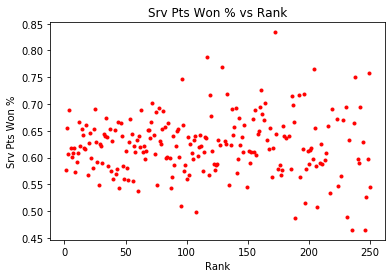

In [77]:
x = data['Rank']
y = data['Srv Pts Won %']
plt.plot(x,y,'r.')
plt.title("Srv Pts Won % vs Rank")
plt.xlabel('Rank')
plt.ylabel('Srv Pts Won %')


Text(0, 0.5, 'BP SVD %')

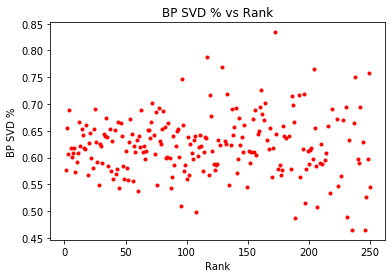

In [78]:
x = data['Rank']
y = data['BP SVD %']
plt.plot(x,y,'r.')
plt.title("BP SVD % vs Rank")
plt.xlabel('Rank')
plt.ylabel('BP SVD %')



Text(0, 0.5, 'Srv Gm Won %')

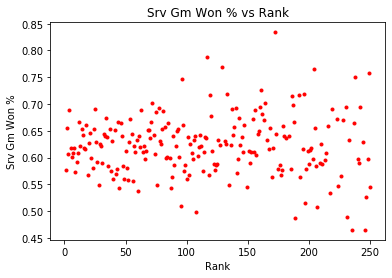

In [79]:

x = data['Rank']
y = data['Srv Gm Won %']
plt.plot(x,y,'r.')
plt.title("Srv Gm Won % vs Rank")
plt.xlabel('Rank')
plt.ylabel('Srv Gm Won %')



From the exploratory data visualisation we can see:
1. As number of matches increase rank tends to increase
2. AS number of aces increase rank tends to increase 
3. There is no obvious relationshio between serv statistics and rank




## Methodology <a name="methodology"></a>

The most sensible machine learning algorith to predict the rank of tennis players based on thier surving stats is the regression method. We have seen there are some linear and non-linear relationships from the exploratory analysis. We should use a non-linear multiple regression, however this is outside the scope of the course. Instead we shall use a multiple linear regression. Simple non-linear regression would not be suitable as we have multiple input data, hence multiple linear regression is the most sensible technique.

The multiple linear regression requires the data to be split into a training and testing data set. This will have an 80% split. The model coefficients will be created on the training dataset and then evaluated on the test datasets. 

Different input paramterts will be selected to see if we can improve the model and infer any relationships.

## Training Model <a name="Training Model"></a>

In [93]:
#Create the Train and test split
msk = np.random.rand(len(data)) < 0.8
train = data[msk]
test = data[~msk]
train.head()

,Rank,Matches,Aces,DF,1st Srv %,1st Srv Pts %,2nd Srv %,Srv Pts Won %,BP SVD %,Srv Gm Won %
66,250,3,20,13,0.544922,0.544922,0.544922,0.544922,0.544922,0.544922
67,249,3,2,3,0.757812,0.757812,0.757812,0.757812,0.757812,0.757812
68,248,3,2,4,0.597168,0.597168,0.597168,0.597168,0.597168,0.597168
69,247,3,13,20,0.526855,0.526855,0.526855,0.526855,0.526855,0.526855
70,246,1,4,9,0.465088,0.465088,0.465088,0.465088,0.465088,0.465088


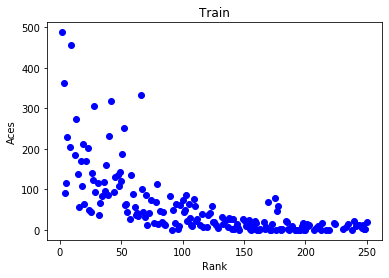

In [95]:
plt.scatter(train.Rank, train.Aces,  color='blue')
plt.xlabel("Rank")
plt.ylabel("Aces")
plt.title("Train")
plt.show()

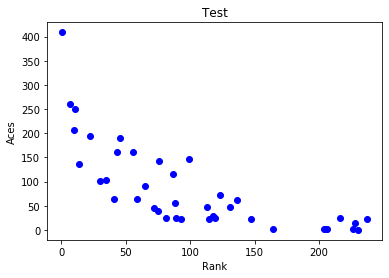

In [96]:
plt.scatter(test.Rank, test.Aces,  color='blue')
plt.xlabel("Rank")
plt.ylabel("Aces")
plt.title("Test")
plt.show()

Looks like the train test split has worked - moving on...


In [98]:
list(data.columns)

['Rank',
 'Matches',
 'Aces',
 'DF',
 '1st Srv %',
 '1st Srv Pts %',
 '2nd Srv %',
 'Srv Pts Won %',
 'BP SVD %',
 'Srv Gm Won %']

In [99]:

regr = linear_model.LinearRegression()
x = np.asanyarray(train[['Matches','Aces','DF','1st Srv %','1st Srv Pts %','2nd Srv %','Srv Pts Won %','BP SVD %','Srv Gm Won %']])
y = np.asanyarray(train[['Rank']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[ -4.16161335   0.07994436   0.15445892 -11.95767715 -11.95767715
  -11.95767715 -11.95767715 -11.95767715 -11.95767715]]


In [100]:
y_hat= regr.predict(test[['Matches','Aces','DF','1st Srv %','1st Srv Pts %','2nd Srv %','Srv Pts Won %','BP SVD %','Srv Gm Won %']])
x = np.asanyarray(test[['Matches','Aces','DF','1st Srv %','1st Srv Pts %','2nd Srv %','Srv Pts Won %','BP SVD %','Srv Gm Won %']])
y = np.asanyarray(test[['Rank']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 1649.47
Variance score: 0.67


Right so Variance is 0.67 maybe we could simplify and just use matches, aces and DF...
Lets see if that improves it.


In [103]:

regr = linear_model.LinearRegression()
x = np.asanyarray(train[['Matches','Aces','DF']])
y = np.asanyarray(train[['Rank']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)
y_hat= regr.predict(test[['Matches','Aces','DF']])
x = np.asanyarray(test[['Matches','Aces','DF']])
y = np.asanyarray(test[['Rank']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Coefficients:  [[-4.32520063  0.09911102  0.18323342]]
Residual sum of squares: 1607.82
Variance score: 0.68


Slight improvement 0.68 variance and RSS is lower.
Lets try the model with just percentage stats....

In [105]:

regr = linear_model.LinearRegression()
x = np.asanyarray(train[['1st Srv %','1st Srv Pts %','2nd Srv %','Srv Pts Won %','BP SVD %','Srv Gm Won %']])
y = np.asanyarray(train[['Rank']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)
y_hat= regr.predict(test[['1st Srv %','1st Srv Pts %''Srv Pts Won %','BP SVD %','Srv Gm Won %']])
x = np.asanyarray(test[['1st Srv %','1st Srv Pts %','2nd Srv %','Srv Pts Won %','BP SVD %','Srv Gm Won %']])
y = np.asanyarray(test[['Rank']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Coefficients:  [[-11.03085  -11.030851 -11.030853 -11.030853 -11.030853 -11.030853]]
Residual sum of squares: 5362.02
Variance score: -0.08


So this clearly shows us that there is no relationship between service stats and rank

## Results and Discussion <a name="results"></a>

Our analysis shows that there is a relationship between number of matches played, number of aces and number of double faults vs rank. There is a no relationshio between service percentages and rank. There may be some flaw with the methodolgy. We see that some of the data relationships with rank are non-linear hence a multiple non-linear regression should be used, however this is outside the scope of this course.
The regression model was best when only using matches, aces and double faults to predict the rank. The variance was 0.67 which provides little confidence in the model. This may be due to the factors not considered in this investigation such as return statistics, unforced errors, winners etc. Further investigation should include these. 


## Conclusion <a name="conclusion"></a>

The regression model was suitable for the prediction, however the results were not optimal. This may be due to the factors not considered in this study and further investigation is needed in order to predict womens tennis rankings in the future. 